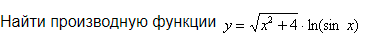

In [7]:
from sympy import *
import numpy as np
import math

x = Symbol('x')
y = sqrt(x**2 + 4) * log(sin(x))

result = y.diff(x)
print(f"y' = {result}")

y' = x*log(sin(x))/sqrt(x**2 + 4) + sqrt(x**2 + 4)*cos(x)/sin(x)
